<a href="https://colab.research.google.com/github/JosephW23/Portfolio-Optimization/blob/main/Milestone2_CSE151A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/macrosynergy/fixed-income-returns-and-macro-trends


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv("JPMaQS_Quantamental_Indicators.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0   real_date  cid              xcat     value  grading  eop_lag  \
0           0  2000-01-03  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     95.0   
1           1  2000-01-04  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     96.0   
2           2  2000-01-05  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     97.0   
3           3  2000-01-06  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     98.0   
4           4  2000-01-07  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     99.0   

   mop_lag  
0    292.0  
1    293.0  
2    294.0  
3    295.0  
4    296.0  


In [ ]:
# Get a summary of the dataset
print("\nSummary of the dataset:")
print(df.info())

# Get descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
missing_values = df.isnull().sum()
print(missing_values)


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390059 entries, 0 to 3390058
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   real_date   object 
 2   cid         object 
 3   xcat        object 
 4   value       float64
 5   grading     float64
 6   eop_lag     float64
 7   mop_lag     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 206.9+ MB
None

Descriptive statistics of the dataset:
         Unnamed: 0         value       grading       eop_lag       mop_lag
count  3.390059e+06  3.390059e+06  3.390059e+06  3.390059e+06  3.390059e+06
mean   1.695029e+06  1.977237e+00  1.366171e+00  1.715745e+01  1.412662e+02
std    9.786259e+05  4.441622e+00  5.322838e-01  2.811768e+01  2.457459e+02
min    0.000000e+00 -4.894521e+01  1.000000e+00 -3.000000e+01 -1.500000e+01
25%    8.475145e+05  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
50%    1.695029e+06  7.496109e-01  1.000000e+00 

Based on the results, the dataset has 3,390,059 entries and 8 columns. The dataset contains no missing values, which is good. The columns contain numerical and categorical data. Below is a quick summary of each column:

Unnamed: 0: An index column (likely not required for analysis).

real_date: The date for each item.
Cid: Currency identifier.

xcat is the quantitative indicator's category.

value: The value of the indicator.

Grading: The evaluation of a value.

eop_lag: End of period lag (may indicate a delay in reporting).

mop_lag: Middle of period lag (may suggest a delay in reporting).

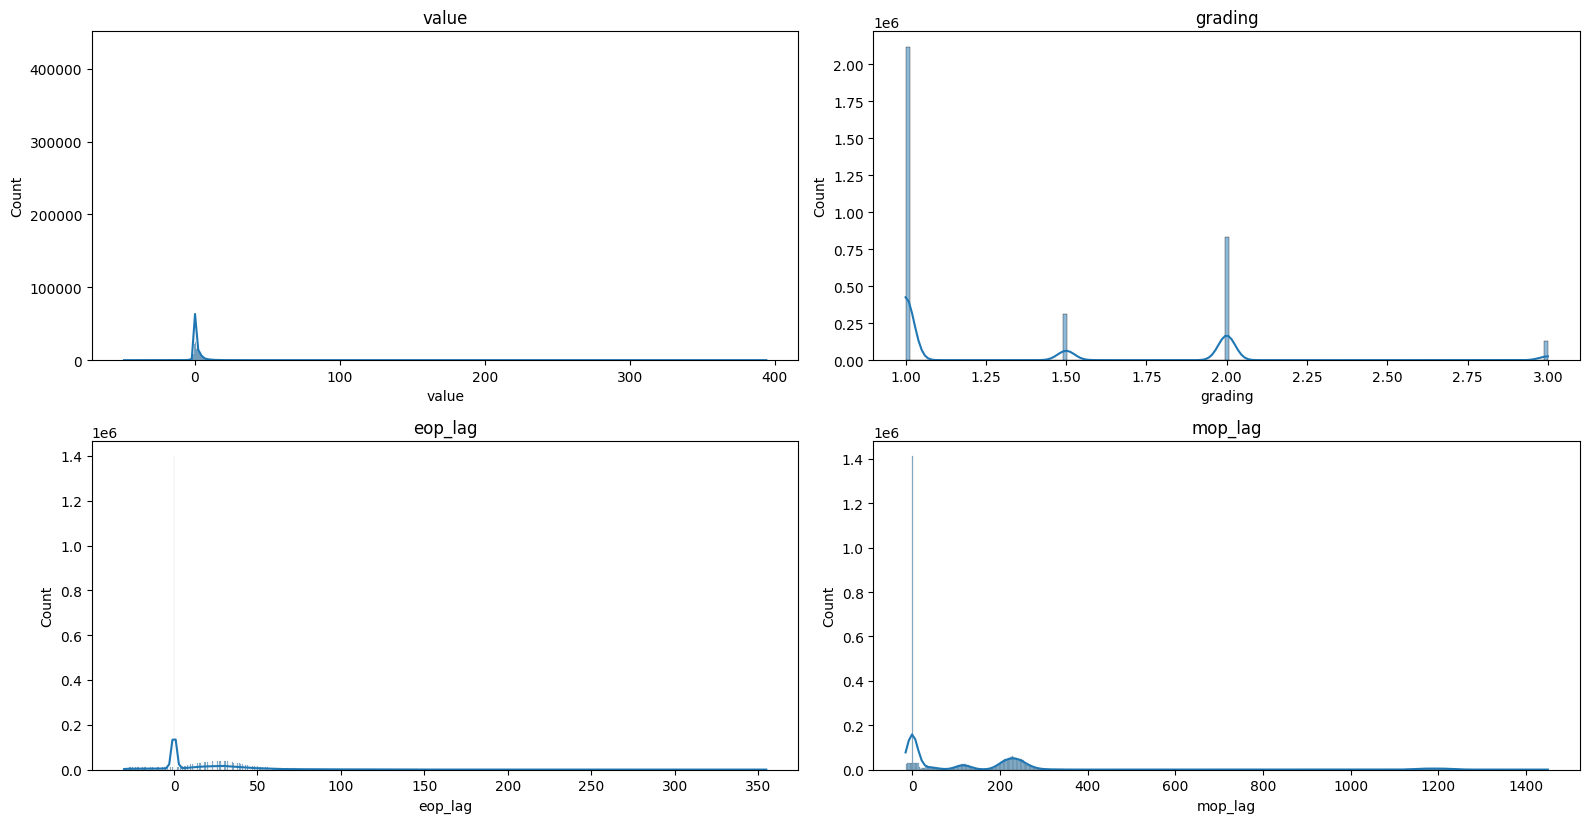

In [ ]:
# List of numerical columns
numerical_cols = ['value', 'grading', 'eop_lag', 'mop_lag']

# Plot distributions
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


Value: The value column exhibits a strongly skewed distribution, with the majority of the values concentrated around zero.

Grading: The grading column has distinct peaks, representing the most commonly used grades (1.0, 2.0, and 3.0).

Eop_lag: The eop_lag column is similarly highly skewed, with most values near 0.

Mop_lag: Like eop_lag, the mop_lag column has a skewed distribution, with most values near to zero but some outliers reaching large values.

These visualizations aid in identifying the need for normalization or adjustments during the preprocessing stage, particularly for the value, eop_lag, and mop_lag columns, which have skewed distributions.

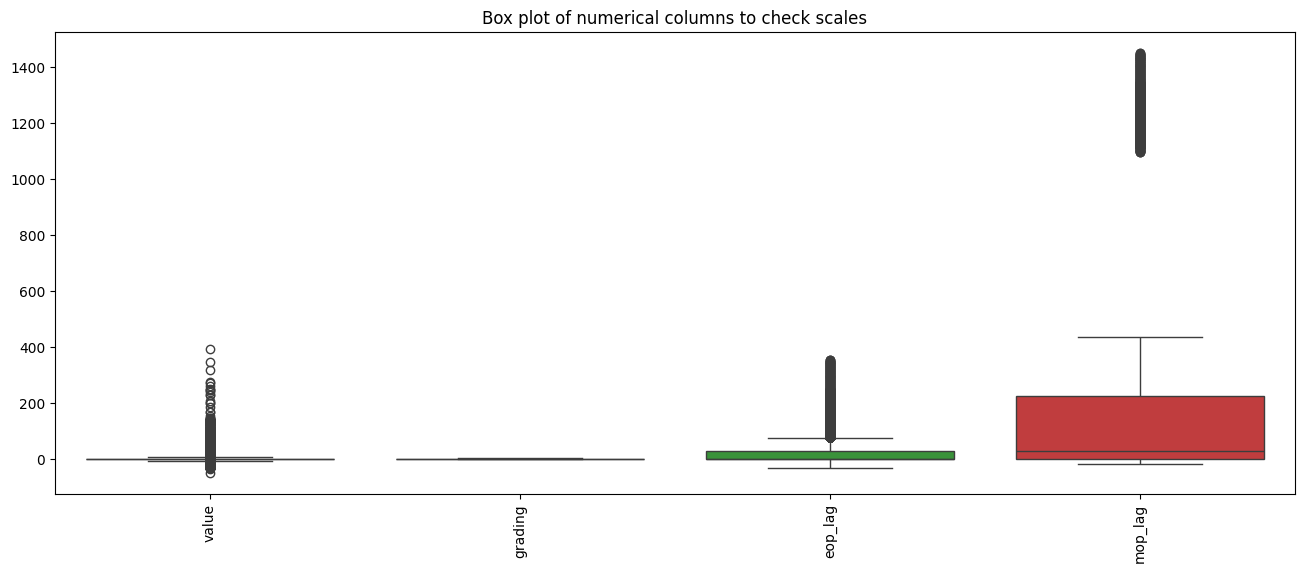

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title('Box plot of numerical columns to check scales')
plt.show()

In [ ]:
df = df.drop(columns = ["Unnamed: 0"])

In [ ]:
df['real_date'] = pd.to_datetime(df['real_date'])

In [ ]:
df.dtypes

real_date    datetime64[ns]
cid                  object
xcat                 object
value               float64
grading             float64
eop_lag             float64
mop_lag             float64
dtype: object

In [ ]:
print(df.head())
print(df.info())

   real_date  cid              xcat     value  grading  eop_lag  mop_lag
0 2000-01-03  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     95.0    292.0
1 2000-01-04  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     96.0    293.0
2 2000-01-05  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     97.0    294.0
3 2000-01-06  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     98.0    295.0
4 2000-01-07  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     99.0    296.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390059 entries, 0 to 3390058
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   real_date  datetime64[ns]
 1   cid        object        
 2   xcat       object        
 3   value      float64       
 4   grading    float64       
 5   eop_lag    float64       
 6   mop_lag    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 181.0+ MB
None


array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'grading'}>],
       [<Axes: title={'center': 'eop_lag'}>,
        <Axes: title={'center': 'mop_lag'}>]], dtype=object)

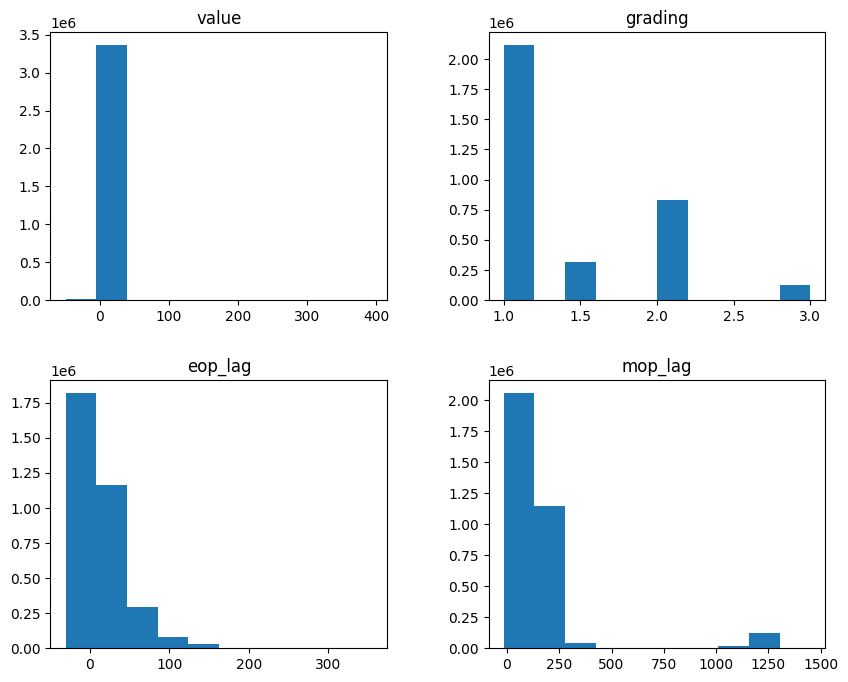

In [ ]:
#Checking distribution for numerical columns
numerical_columns = ['value', 'grading', 'eop_lag', 'mop_lag']
df[numerical_columns].hist(figsize=(10, 8), bins = 10, grid = False)
